# Analyse de la structure de bande du KHS

In [93]:
#importation du CIF et des packages nécessaires
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
with MPRester("im80MbCif8QDmhc2y") as m:
    
    structure = m.get_structure_by_material_id("mp-38011")
    
    bstruct= m.get_bandstructure_by_material_id("mp-38011") #structure de bande du matériaux
    

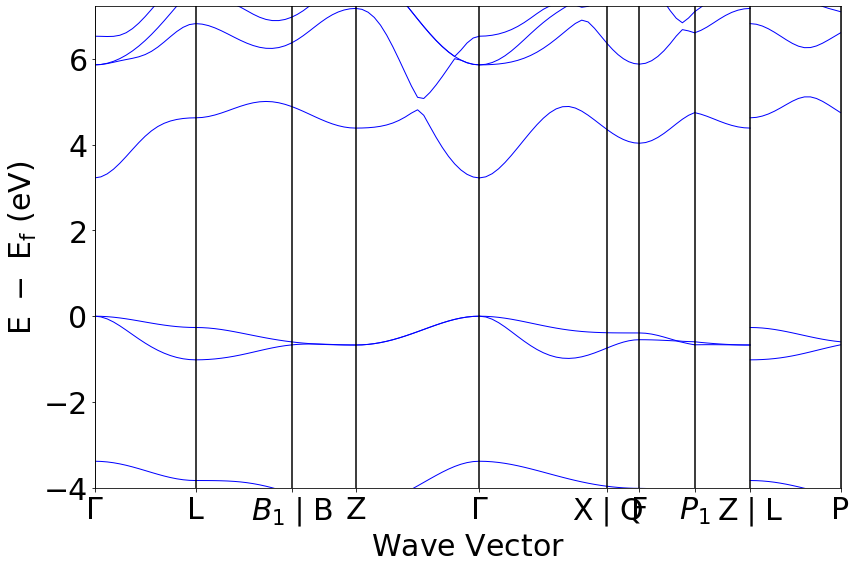

In [94]:
bsp = BSPlotter(bstruct)
bsp.show()

# Analyse de la bande interdite

In [95]:
bint=bstruct.get_band_gap()
print(bint)

{'direct': True, 'energy': 3.2247999999999997, 'transition': '\\Gamma-\\Gamma'}


L'énergie de cette bande est de 3.2247 eV, la transition des électrons se fait du point de vecteur d'onde Gamma au point de vecteur d'onde Gamme. En effet, comme le maximum de la dernière bande de valence est aligné avec le minimum de la première bande de conduction, la bande interdite est donc directe.
Sur le graphe suivant (issu du material project : https://materialsproject.org/materials/mp-38011/) on constate bien que ce fameux alignement qui fait que la bande est directe
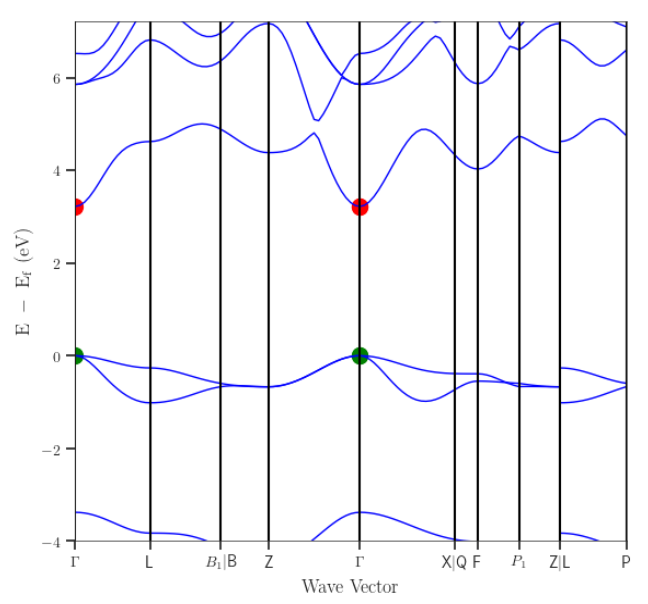


# Analyse de la dispersion

1. Bande de valence

In [96]:

V_ord = bsp.bs_plot_data().get('energy') 
V_abs = bsp.bs_plot_data().get('distances')
V_index = bstruct.get_vbm().get('band_index')
print(V_index)

p_min = 100
p_max = 0
br_min = 0
br_max = 0


for k in range(0, len(V_abs)):
    distI = V_abs[k][0]
    distF = V_abs[k][-1]
    enI = V_ord[k]['1'][7][0]
    enF = V_ord[k]['1'][7][-1]
    p = (enF-enI)/(distF-distI)
    p_abs = abs(p)
    
    if p_abs<p_min:
        br_min = k
        p_min = p_abs
    
    if p_abs>p_max:
        br_max = k
        p_max = p_abs
    

print('Bande de valence : direction avec le plus de dispersion = ', p_max)
print('\n Bande de valence : direction avec le moins de dispersion = ', p_min)

defaultdict(<class 'list'>, {<Spin.up: 1>: [6, 7]})
Bande de valence : direction avec le plus de dispersion =  0.6952738499667588

 Bande de valence : direction avec le moins de dispersion =  0.018727719549577217


2.Bande de conduction

In [97]:
C_ord = bsp.bs_plot_data().get('energy') 
C_abs = bsp.bs_plot_data().get('distances')
C_index = bstruct.get_cbm().get('band_index')
print(C_index)

Cp_min = 100
Cp_max = 0
Cbr_min = 0
Cbr_max = 0


for k in range(0, len(C_abs)):
    distI = C_abs[k][0]
    distF = C_abs[k][-1]
    enI = C_ord[k]['1'][8][0]
    enF = C_ord[k]['1'][8][-1]
    p = (enF-enI)/(distF-distI)
    p_abs = abs(p)
    
    if p_abs<Cp_min:
        Cbr_min = k
        Cp_min = p_abs
    
    if p_abs>Cp_max:
        Cbr_max = k
        Cp_max = p_abs
    


print('Bande de conduction : direction avec le plus de dispersion = ', Cp_max)
print('\n Bande de conduction : direction avec le moins de dispersion = ', Cp_min)

defaultdict(<class 'list'>, {<Spin.up: 1>: [8]})
Bande de conduction : direction avec le plus de dispersion =  1.7730257917324537

 Bande de conduction : direction avec le moins de dispersion =  0.17095370815972594


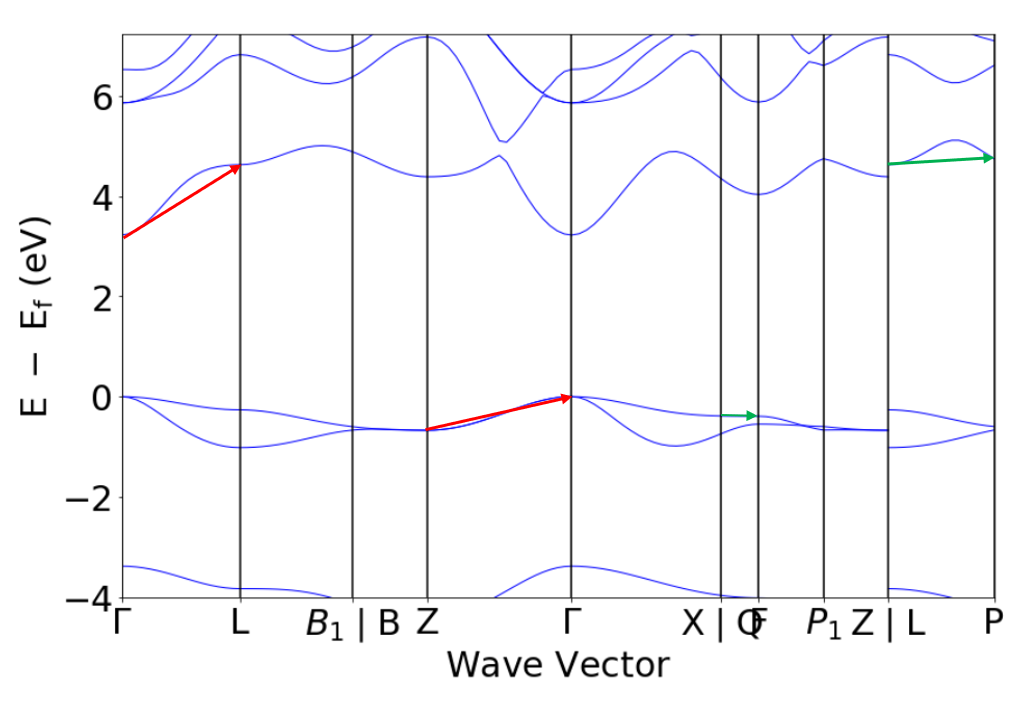

# Masse effective